# Spectral Analysis

## Question 1
Generate a discrete-time sinusoid with frequency ω0 = π/16, sampled at 8000 Hz. Generate samples for 2 seconds of the signal.
(a) Save and write the signal as a wav file.
(b) Play the wav file and listen to it.
(c) Plot the signal in time domain.
(d) Compute its Fourier transform using DFT. Plot the magnitude
spectrum. Ensure that the x-axis shows discrete frequency.

In [2]:
import soundfile as sf
import librosa as lb

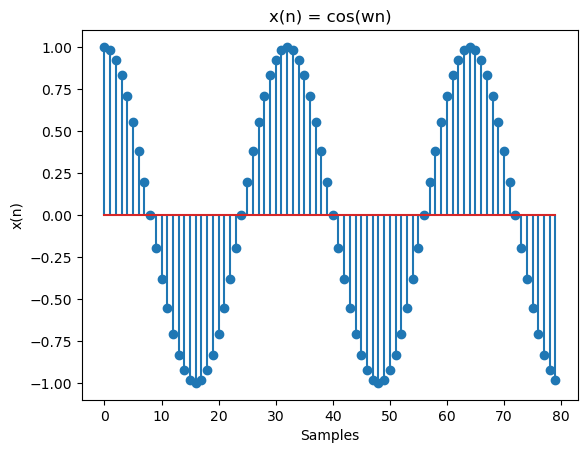

In [4]:
import matplotlib.pyplot as plt
import numpy as np


fs = 8000 #Sampling freq
w = np.pi/16
tsec = 0.01

n = np.arange(0, fs*tsec, 1)
y = np.cos(w*n)
plt.stem(n, y)
plt.xlabel('Samples')
plt.ylabel('x(n)')
plt.title('x(n) = cos(wn)')
plt.show()

### Subdivison A

In [4]:
tsec = 2
w = 2*np.pi/8
fs = 8000
n = np.arange(0, fs*tsec, 1)
y = np.cos(w*n)

sf.write('/Users/rajeshr/Desktop/sound1.wav', y, fs)

### Subdivison C

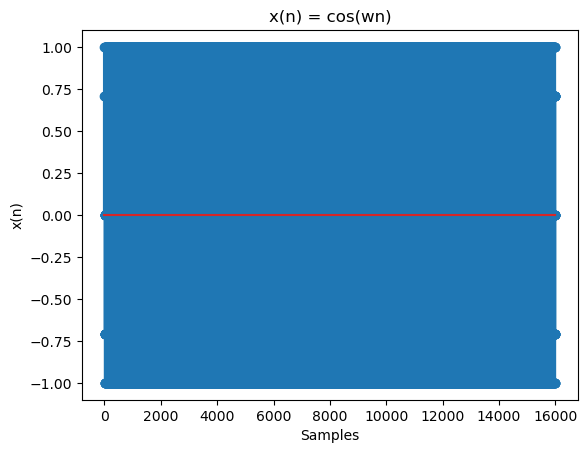

In [5]:
plt.stem(n, y)
plt.xlabel('Samples')
plt.ylabel('x(n)')
plt.title('x(n) = cos(wn)')
plt.show()

### Subdivision D

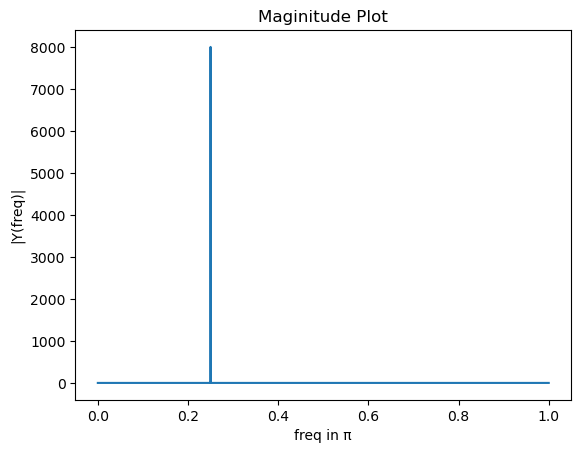

In [6]:
from scipy import fft

fftY = np.fft.fft(y)
freq = np.arange(0, len(fftY))

fftY = fftY[range(int(len(fftY)/2))]
freq = 2*freq[range(int(len(freq)/2))]/len(freq)


plt.plot(freq, abs(fftY))
plt.xlabel('freq in π')
plt.ylabel('|Y(freq)|')
plt.title('Maginitude Plot')

plt.show()

# Question 2

Generate the signal x(n) = 4 cos(π16n)+ cos(π32n), sampled at 8000 Hz.Generate the signal for 5 seconds.
(a) Save and write the signal as a wav file.
(b) Play the wav file and listen to it.
(c) Plot the signal in the time domain.
(d) Compute its Fourier transform and plot the magnitude spectrum.
Ensure that the x-axis shows discrete frequency.

In [7]:
import matplotlib.pyplot as plt
import numpy as np


fs = 8000 #Sampling freq
tsec = 5

w1 = 2*np.pi/8
n1 = np.arange(0, fs*tsec, 1)
y1 = 4*np.cos(w1*n1)

w2 = 2*np.pi/4
n2 = np.arange(0, fs*tsec, 1)
y2 = np.cos(w2*n2)

y = y1+y2
n = n1

### Subdivison A

In [8]:
sf.write('/Users/rajeshr/Desktop/sound2.wav', y, fs)

### Subdivison C

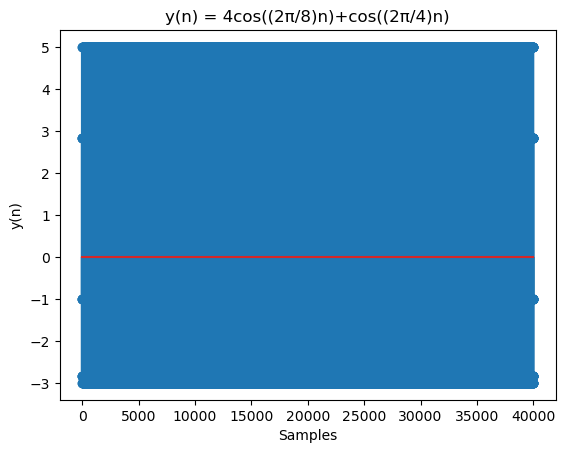

In [9]:
plt.stem(n, y)
plt.xlabel('Samples')
plt.ylabel('y(n)')
plt.title('y(n) = 4cos((2π/8)n)+cos((2π/4)n)')
plt.show()

### Subdivison D

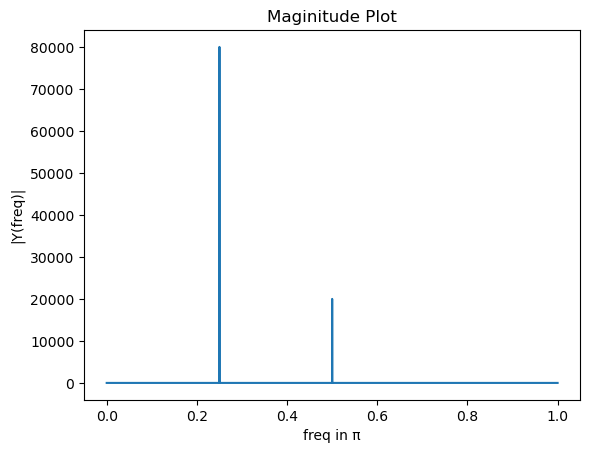

In [10]:
from scipy import fft

fftY = np.fft.fft(y)
freq = np.arange(0, len(fftY))

fftY = fftY[range(int(len(fftY)/2))]
freq = 2*freq[range(int(len(freq)/2))]/len(freq)


plt.plot(freq, abs(fftY))
plt.xlabel('freq in π')
plt.ylabel('|Y(freq)|')
plt.title('Maginitude Plot')

plt.show()

# Short-time Processing

## Question 3
 In this question, you will be using the audio file should.wav.
(a) Load the audio file. Listen to it. Plot the signal in the time
domain. What is the sampling rate?

In [11]:
import soundfile as sf
import librosa as lb

data, fs = sf.read('/Users/rajeshr/Desktop/should.wav')
print(data, fs)

[0.00039673 0.00045776 0.00012207 ... 0.00082397 0.00033569 0.00018311] 10000


### Subdivison A

In [12]:
print('Sampling Frequency: ', fs)

Sampling Frequency:  10000


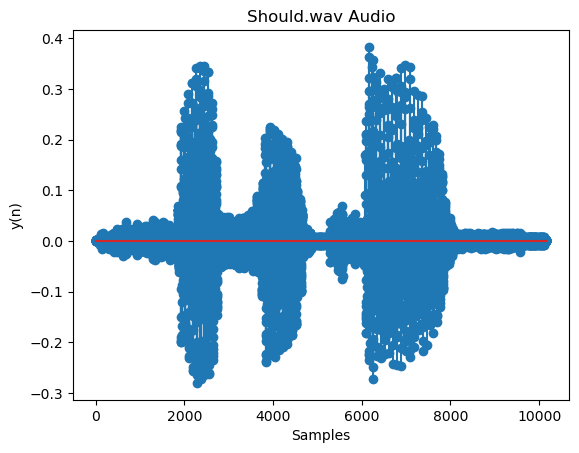

In [13]:
n = np.arange(0, len(data))
y = data

plt.stem(n, y)
plt.xlabel('Samples')
plt.ylabel('y(n)')
plt.title('Should.wav Audio')
plt.show()

### Subdivision B

Write a function enframe(x,winsize,hoplength,fs,wintype)
which accepts the signal x, the window size (in sec) winsize, the
hop length (in sec) hoplength, and the sampling rate (in Hz) fs.
wintype is a either ‘rect’ or ‘hamm’, which is either a rectangular
or a Hamming window. The function should return a matrix
containing the windowed frames of the signal. Typical values are
30ms for winsize and 15ms for hoplength.

In [138]:
import soundfile as sf
import librosa as lb
import math
import scipy

data, fs = sf.read('/Users/rajeshr/Desktop/should.wav')
print(data, fs)

[0.00039673 0.00045776 0.00012207 ... 0.00082397 0.00033569 0.00018311] 10000


In [21]:
def enframe(sig, window, O = 0.5):
    
    n = len(sig)
    nw = len(window)
    step = math.floor(nw * (1 - O))
    nb = math.floor((n - nw) / step) + 1
    B = np.zeros((nb, nw))
    for i in range(nb):
        offset = i * step
        B[i, :] = window * sig[offset : nw + offset]

    return B

(c) Compute the time-dependent Fourier transform of the frames returned by the above function. Plot the magnitude spectrum.
Cycle through the log magnitude spectrum for each frame.
(d) Experiment the previous question using a Hamming window and
using a rectangular window. Do you note any difference in the
spectra?

In [23]:
sym = False
wind = hamming(math.floor(0.03*fs), sym)

frames = FrameBlocks(data, wind)
print(len(frames), len(frames[0]))

66 300


In [24]:
def plot_spectrum(frames, frame_no):
    frame = frames[frame_no]
    dft_frame = np.fft.fft(frame)
    
    x = np.arange(len(frame)/2)
    
    # Getting DFT Spectrum
    y1 = np.log(abs(dft_frame[:int(len(frame)/2)]))
    
    
    plt.title('DFT Spectrum of frame: '+str(frame_no))
    plt.xlabel('frequency in π units')
    plt.ylabel('log|X(w)|')
    plt.plot(x/max(x),y1)
    plt.show()

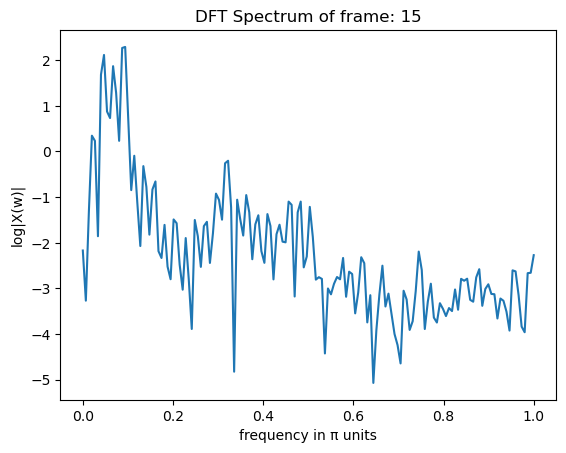

In [25]:
plot_spectrum(frames, 15)

# Audio Segmentation

Segment the file should.wav into three parts using energy-based segmentation. Use the enframe function you developed earlier. Based on the output, cut the signal into parts. Save each part as a wav file and play it.

In [9]:
import soundfile as sf
import librosa as lb
import math
from scipy.signal.windows import hann, hamming
import numpy as np

data, fs = sf.read('/Users/rajeshr/Desktop/should.wav')
print(data, fs)

[0.00039673 0.00045776 0.00012207 ... 0.00082397 0.00033569 0.00018311] 10000


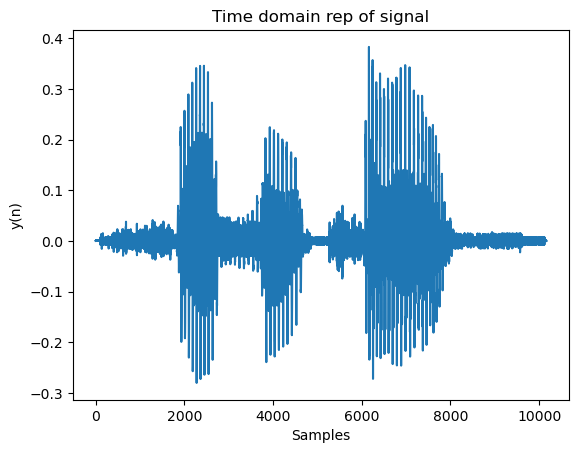

In [10]:
n = np.arange(0, len(data))
y = data

plt.plot(n, y)
plt.xlabel('Samples')
plt.ylabel('y(n)')
plt.title('Time domain rep of signal')
plt.show()

In [11]:
def FrameBlocks(sig, window, O = 0.5):
    
    n = len(sig)
    nw = len(window)
    step = math.floor(nw * (1 - O))
    nb = math.floor((n - nw) / step) + 1
    B = np.zeros((nb, nw))
    for i in range(nb):
        offset = i * step
        B[i, :] = window * sig[offset : nw + offset]

    return B

In [12]:
sym = False
wind = hamming(math.floor(0.03*fs), sym)

frames = FrameBlocks(data, wind)
print(len(frames), len(frames[0]))

66 300


In [13]:
energy = []
for each_frame in frames:
    energy.append(sum([abs(i)**2 for i in each_frame]))
    
max_energy = max(energy)

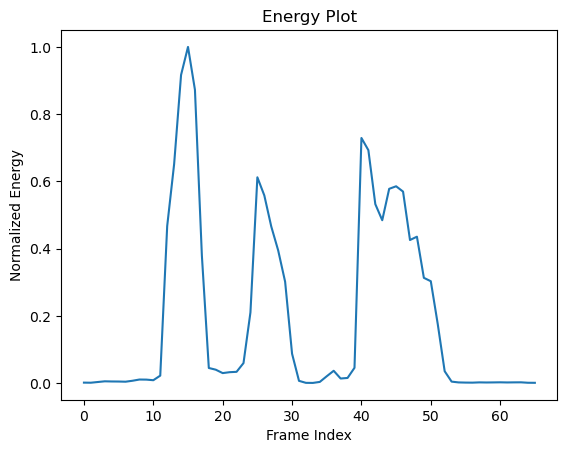

In [14]:
x = np.arange(len(energy))
plt.plot(x, energy/max_energy)
plt.xlabel('Frame Index')
plt.ylabel('Normalized Energy')
plt.title('Energy Plot')
plt.show()

In [15]:
normalized_energy = energy/max_energy
threshold = 0.4

frame_index = []
count = 1
count_list = []
for i in range(len(normalized_energy)):
    if normalized_energy[i] > 0.4:
        np.array(frame_index.append(i))
        count += 1
    else:
        if count != 0:
            count_list.append(count)
        count = 0
        
        
print(frame_index)
del count_list[0]
print(count_list)

[12, 13, 14, 15, 16, 25, 26, 27, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[5, 3, 9]


In [16]:
extracted_frames = []
for i in range(len(frames)):
    if i in frame_index:
        extracted_frames.append(frames[i])
        
print(len(extracted_frames))

17


In [17]:
from itertools import accumulate

Extracted_f_index = [frame_index[x - y: x] for x, y in zip(accumulate(count_list), count_list)]
print(Extracted_f_index)

framesGroup = [extracted_frames[x - y: x] for x, y in zip(accumulate(count_list), count_list)]
print(len(framesGroup))

[[12, 13, 14, 15, 16], [25, 26, 27], [40, 41, 42, 43, 44, 45, 46, 47, 48]]
3


In [18]:
resultant_frames = []
for frame in framesGroup:
    resultant_frames.append(np.concatenate(frame))
    
print(len(resultant_frames))

3


In [19]:
for i in range(len(resultant_frames)):
    sf.write('/Users/rajeshr/Desktop/frame'+str(i+1)+'.wav', resultant_frames[i], fs)